In [1]:
require(ISLR)
require(tree)

Loading required package: ISLR
Loading required package: tree


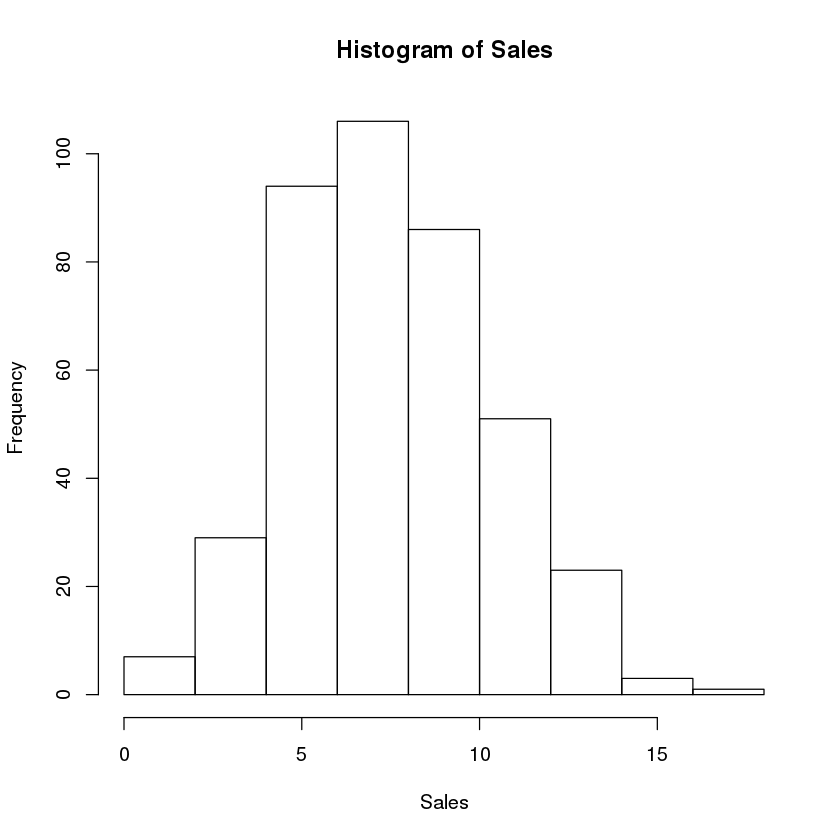

In [2]:
attach(Carseats)
hist(Sales)

In [3]:
High = ifelse(Sales <= 8, "No", "Yes")
Carseats = data.frame(Carseats, High)

In [4]:
tree.carseats = tree(High ~ . - Sales, data = Carseats)
summary(tree.carseats)


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

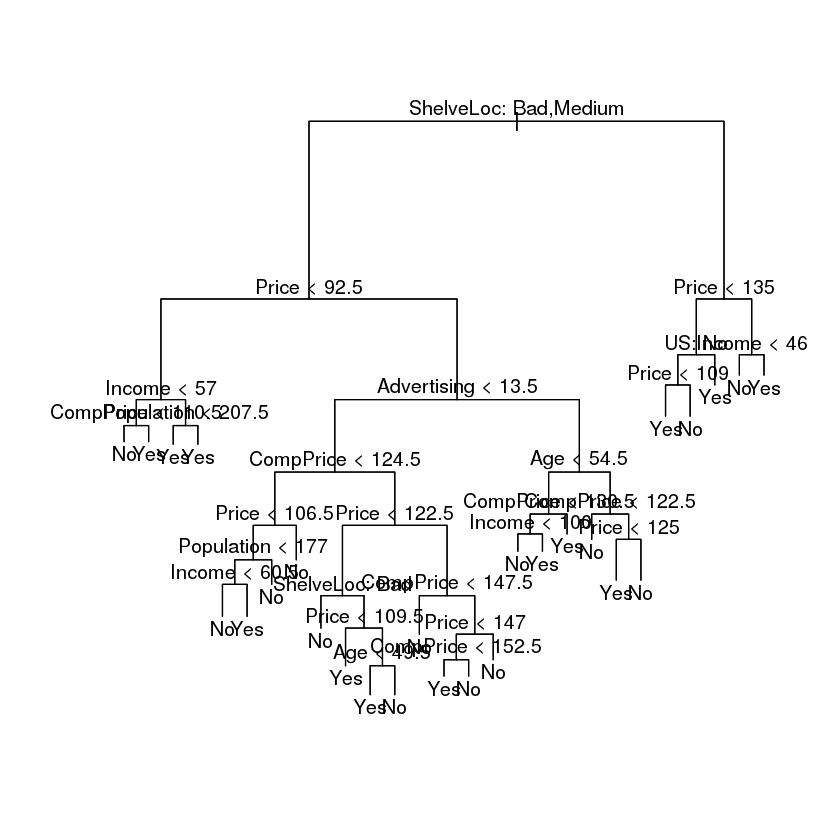

In [5]:
plot(tree.carseats)
text(tree.carseats, pretty = 0)

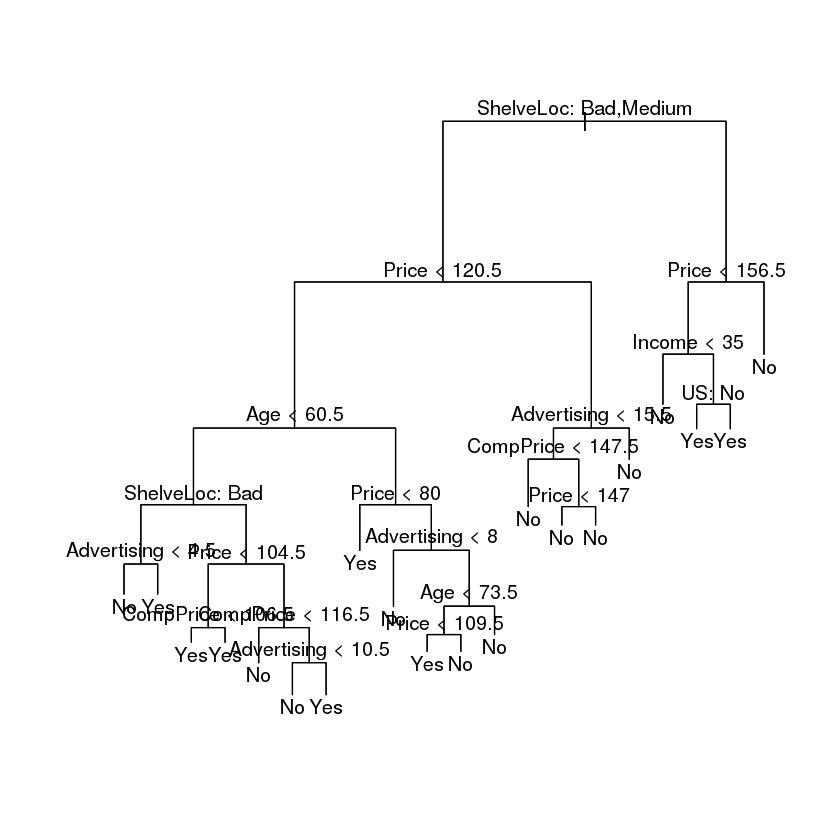

In [6]:
set.seed(1011)
train = sample(1:nrow(Carseats), 250)
tree.carseats = tree(High ~ . - Sales, Carseats, subset = train)
plot(tree.carseats)
text(tree.carseats, pretty = 0)

In [7]:
tree.pred = predict(tree.carseats, Carseats[-train, ], type = "class")
with(Carseats[-train, ], table(tree.pred, High))

         High
tree.pred No Yes
      No  72  27
      Yes 18  33

In [8]:
cv.carseats = cv.tree(tree.carseats, FUN = prune.misclass)
cv.carseats

$size
 [1] 20 14 13 10  9  7  6  5  2  1

$dev
 [1]  65  65  57  57  59  64  64  59  78 104

$k
 [1]      -Inf  0.000000  1.000000  1.333333  2.000000  2.500000  4.000000
 [8]  5.000000  9.000000 31.000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

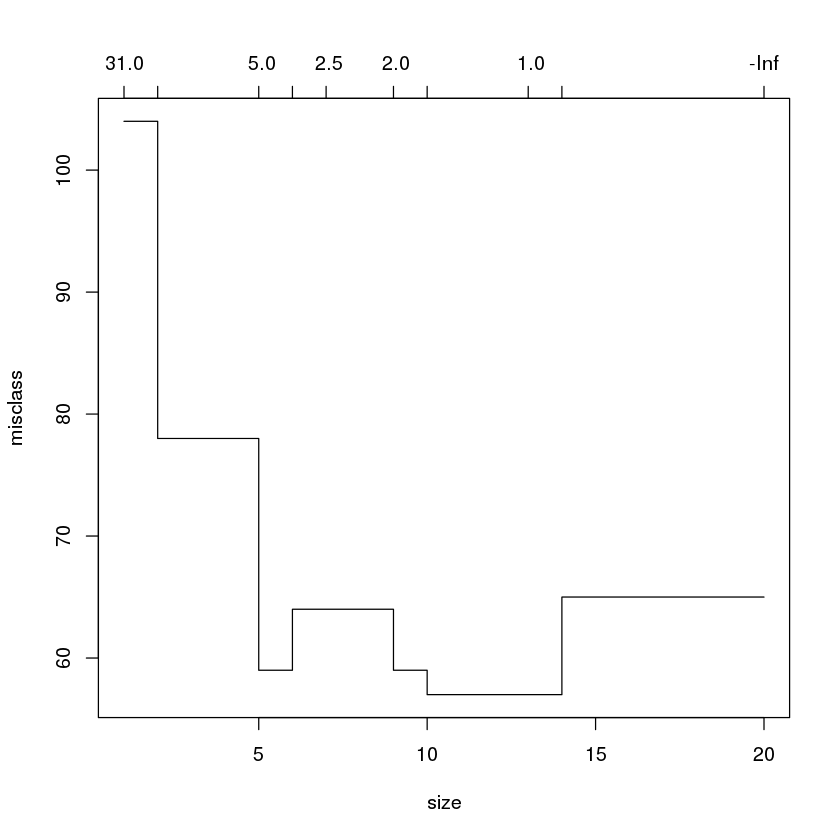

In [9]:
plot(cv.carseats)

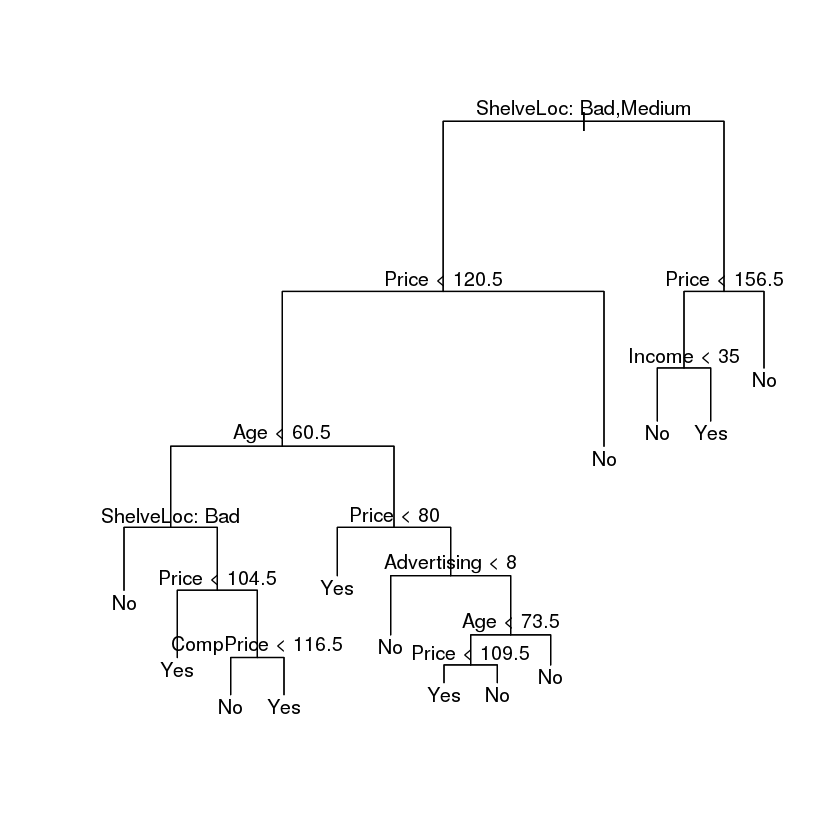

In [10]:
prune.carseats = prune.misclass(tree.carseats, best = 13)
plot(prune.carseats)
text(prune.carseats, pretty = 0)

In [11]:
tree.pred = predict(prune.carseats, Carseats[-train, ], type = "class")
with(Carseats[-train, ], table(tree.pred, High))

         High
tree.pred No Yes
      No  72  28
      Yes 18  32